In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = None

pd.options.mode.chained_assignment = None


In [2]:
data = pd.read_excel('C:/Users/BASU/WORK/DATA/Orders_till_oct.xlsx')


In [3]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [4]:
data['invoice_month'] = data['order_date'].apply(get_month)
data['cohort_month'] = data.groupby('full_name')['invoice_month'].transform('min')

In [6]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year , month , day

In [7]:
in_year, in_month, _ = get_date(data, 'invoice_month') 
c_year, c_month, _ = get_date(data, 'cohort_month')
y_dif = in_year - c_year
m_dif = in_month - c_month
data['cohort_index'] = y_dif*12 + m_dif + 1

In [12]:
cohort_data = data.groupby(['cohort_month','cohort_index'])['full_name'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'cohort_month', columns = 'cohort_index', values = 'full_name')

In [18]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0 ).round(3)


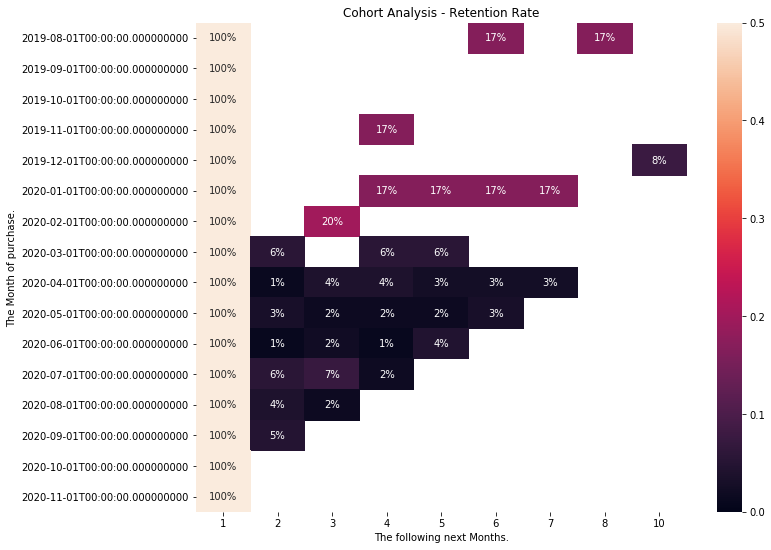

In [19]:
plt.figure(figsize=(11,9))
plt.title('Cohort Analysis - Retention Rate')
c_plot = sns.heatmap(data = retention,
           annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5)
c_plot.set(xlabel="The following next Months.", ylabel = "The Month of purchase.")
a_ret = cohort_count.iloc[:,1:7]
x = a_ret.sum(axis = 1)
y = x.divide(cohort_size, axis = 0).reset_index()
y['accumalative_percentage'] = y.iloc[:,1]*100
y = y.drop(columns = [0])


In [17]:
#cohort_count.to_excel("cohort_numbers.xlsx")
#retention.round(3).to_excel("retention_R.xlsx")


In [18]:
#y.to_excel("accumulative_R.xlsx")